[*********************100%%**********************]  1 of 1 completed

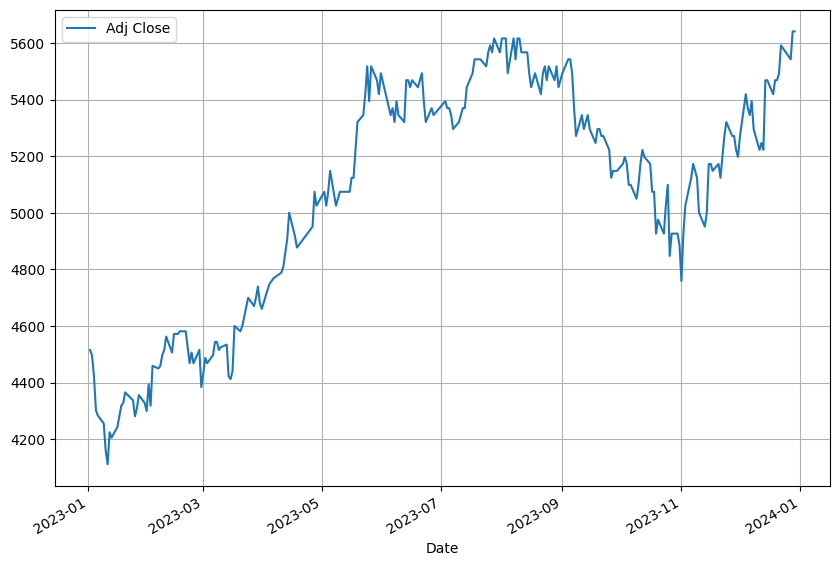

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-21,5550.0,5600.0,5525.0,5575.0,5493.200684,99049600
2023-12-22,5650.0,5700.0,5600.0,5675.0,5591.733398,109411300
2023-12-27,5700.0,5725.0,5625.0,5625.0,5542.467285,122236700
2023-12-28,5700.0,5750.0,5675.0,5725.0,5641.000000,121434600
2023-12-29,5750.0,5750.0,5675.0,5725.0,5641.000000,93126000


In [13]:
# Import the necessary libraries

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the price data of General Motors

df = yf.download('BBRI.JK','2023-01-01', '2023-12-31')
df['Adj Close'].plot(figsize=(10,7))
plt.legend()
plt.grid()
plt.show()
df.tail()

In [14]:
df.shape

(239, 6)

In [17]:
# Calculate the daily percentage change, mean and sigma
df['daily_pct_change'] = df['Adj Close'].pct_change()
mu = df['daily_pct_change'].iloc[:-239].mean()
sigma = df['daily_pct_change'].iloc[:-239].std()

# Creating the random walk simulation of the probable price path
simulation = {}
simulation['Actual'] = list(df['Adj Close'].iloc[-239:].values)

for sim in range(1,5): # Taking 5 paths
    simulation["Simulation_"+str(sim)] = [df['Adj Close'].iloc[-239]]
    for days in range(251):
        next_day = simulation["Simulation_"+str(sim)][-1]*np.exp((mu-(sigma**2/2))+sigma*np.random.normal())
        simulation["Simulation_"+str(sim)].append(next_day)

ValueError: All arrays must be of the same length

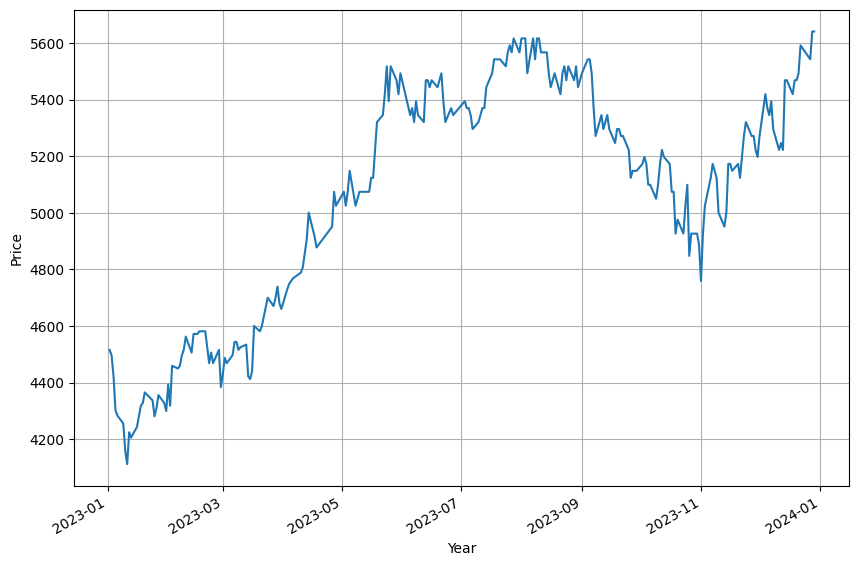

In [18]:
# Plotting the actual Adjusted Close price of General Motors
df['Adj Close'][-239:].plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')

# Plotting the simulation of random walk

simulation=pd.DataFrame(simulation)
simulation.index=df[-239:].index
simulation.plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')